# 🩺 Chronic Kidney Disease Classification using Supervised Machine Learning

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RansiluRanasinghe/CKD-Classification-ML/blob/main/notebook.ipynb)

---

## 📌 Notebook Introduction

This Google Colab notebook demonstrates an **end-to-end supervised machine learning pipeline** for predicting **Chronic Kidney Disease (CKD)** using clinical and laboratory data.

The notebook focuses on the practical application of machine learning concepts, including:

1. ✅ **Data understanding and cleaning**
2. ✅ **Handling missing and inconsistent medical data**
3. ✅ **Feature preprocessing and scaling**
4. ✅ **Dimensionality reduction** using Principal Component Analysis (PCA)
5. ✅ **Training and evaluating** a supervised classification model

---

## 🎯 Key Focus: PCA with and without Scaling

Special attention is given to **PCA behavior with and without feature scaling**, highlighting its importance when working with medical features that have different units and ranges.

This comparison demonstrates:
- How scaling affects principal component variance
- Why standardization is critical for medical data
- The impact of feature magnitude on dimensionality reduction

---

## 💡 Notebook Objectives

The objective of this notebook is not only to achieve **reliable prediction performance**, but also to demonstrate:

- 📊 A **clear, explainable** ML workflow
- 🔄 **Reproducible** methodology
- 🎓 Alignment with **academic coursework** requirements
- 🏥 Understanding of **real-world medical data** constraints


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

####Loading the dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mansoordaku/ckdisease")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ckdisease' dataset.
Path to dataset files: /kaggle/input/ckdisease


In [4]:
import os

dataset_path = "/kaggle/input/ckdisease"

os.listdir(dataset_path)

['kidney_disease.csv']

In [8]:
dataset = os.path.join(dataset_path, "kidney_disease.csv")

df = pd.read_csv(dataset)

display(df.head(10))

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


####Dataset Analysis

In [11]:
print("Dataset shape: ", df.shape)
print("Columns: ", df.columns.tolist())

Dataset shape:  (400, 26)
Columns:  ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [13]:
print("Data types: \n", df.dtypes)

Data types: 
 id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [14]:
missing_vals = df.isnull().sum()
print("Missing values: \n", missing_vals[missing_vals > 0])

Missing values: 
 age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wc       105
rc       130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


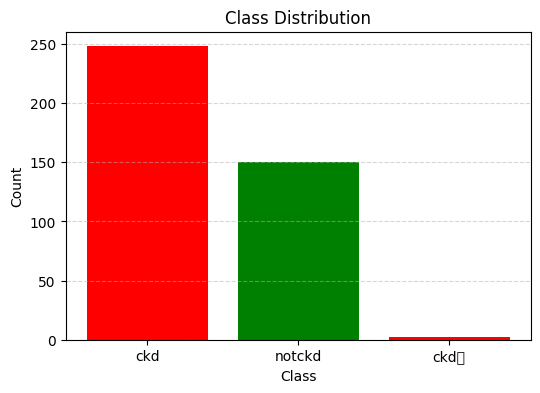

In [18]:
import matplotlib.pyplot as plt

counts = df['classification'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [16]:
target_column = df.columns[-1]
print("Target column: ", target_column)
print(df[target_column].value_counts())

print("\n Class Distibution :\n", df[target_column].value_counts(normalize=True) * 100)

Target column:  classification
classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

 Class Distibution :
 classification
ckd       62.0
notckd    37.5
ckd\t      0.5
Name: proportion, dtype: float64


####Data Cleaning